In [2]:
import pandas as pd
import numpy as np

sulpak_laptop = pd.read_csv('data2/Final_laptop_sulpak.csv')
alser_laptop = pd.read_csv('data/laptopss_alser_kz.csv', sep=';', encoding="cp1251")
alfa_laptop = pd.read_csv('data2/alfakz_notebooks.csv')
print("alser->"+alser_laptop.columns)
# print("alfa->"+alfa_laptop.columns)
# print("sulpak->"+sulpak_laptop.columns)
alser_laptop['Price'] = alser_laptop['Price'].str.split().str.join('') 
alfa_laptop['Price'] = alfa_laptop['Price'].str.replace(' ','') 

alser_laptop['laptop_id'] = alser_laptop['Name'].apply(lambda name: name[name.rindex('(')+1:-1])
# print(alser_laptop.head(1))
sulpak_laptop.loc[sulpak_laptop['code2'] != '', 'code2'] = sulpak_laptop['code2'].str.replace('(','')
sulpak_laptop.loc[sulpak_laptop['code2'] != '', 'code2'] = sulpak_laptop['code2'].str.replace(')','')
                                    
all_laptop = pd.merge(alser_laptop, sulpak_laptop, left_on='laptop_id', right_on='code2')
indexNames = all_laptop[abs(all_laptop['Price'].astype('float') - all_laptop['price'].astype('float')) < 101].index
# Delete these row indexes from dataFrame
all_laptop.drop(indexNames , inplace=True)

all_lap1 = all_laptop[['id','Price']]
all_lap1['market'] = "Alser"

all_lap1['price'] = all_lap1['Price']
all_lap1 = all_lap1[['id', 'price', 'market']]
all_lap2 = all_laptop[['id','price']]
all_lap2['market'] = "Sulpak"

all_lap = all_lap1.append(all_lap2, ignore_index = True)
all_lap['price'] = all_lap['price'].astype('float')
print(all_lap)

Index(['alser->Name', 'alser->Price', 'alser->Mark', 'alser->prod_type',
       'alser->Size', 'alser->OS', 'alser->processor', 'alser->frequency',
       'alser->RAM', 'alser->Hard_type', 'alser->Volume ', 'alser->Videocard'],
      dtype='object')
     id     price  market
0   s59  379990.0   Alser
1    s4  336990.0   Alser
2  s180  589990.0   Alser
3  s150  399990.0   Alser
4  s239  459990.0   Alser
5   s59  419990.0  Sulpak
6    s4  339890.0  Sulpak
7  s180  499990.0  Sulpak
8  s150  379990.0  Sulpak
9  s239  419990.0  Sulpak


<ipython-input-2-c47c1922bb49>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_lap1['market'] = "Alser"
<ipython-input-2-c47c1922bb49>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_lap1['price'] = all_lap1['Price']
<ipython-input-2-c47c1922bb49>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

277
Acer      101.0
Asus       62.0
Apple      49.0
Lenovo     44.0
HP         18.0
Huawei      2.0
Xiaomi      1.0
Name: brand, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

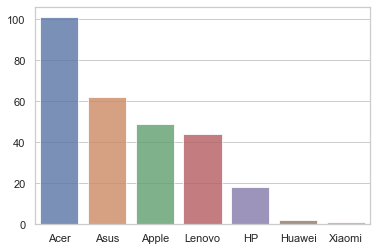

In [3]:
import seaborn as sns
sns.set_theme(style="whitegrid")
item_counts = sulpak_laptop["brand"].value_counts(normalize=True)
print(sulpak_laptop["brand"].count())
# print(item_counts * 277)
types = (item_counts * 277)
print(types)

# who v/s fare barplot 
sns.barplot(types.index, types.values, alpha=0.8)


sulpak    416827.545126
alser     508797.261364
alfa      545875.267148
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

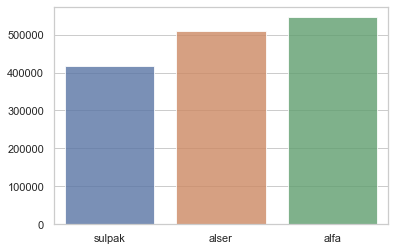

In [10]:
all_prices = pd.DataFrame() 
all_prices['sulpak'] = sulpak_laptop['price'].astype('float')
all_prices['alser'] = alser_laptop['Price'].astype('float')
all_prices['alfa'] = alfa_laptop['Price'].astype('float')
prices = all_prices.mean(skipna = True)
print(all_prices.mean(skipna = True))

sns.barplot(prices.index, prices.values, alpha=0.8)

<AxesSubplot:xlabel='id', ylabel='price'>

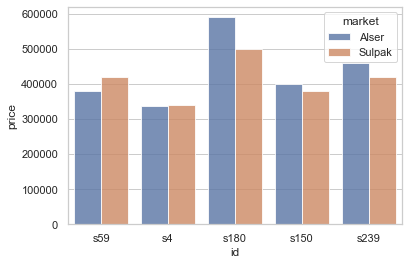

In [4]:
sns.barplot(x="id", y="price", hue = "market", data=all_lap, alpha=0.8)

sulpak    193209.391892
alser     179299.820359
alfa      245878.010667
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

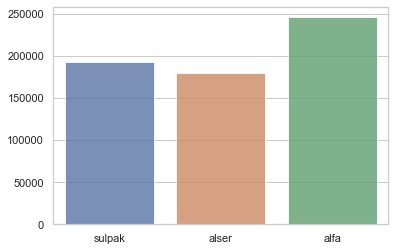

In [5]:
# -----------Smartphones---------------
sulpak_phone = pd.read_csv('data2/Final_phone_sulpak.csv')
alser_phone = pd.read_csv('data2/smartphones_alser_kzz.csv', sep=";")
alfa_phone = pd.read_csv('data2/alfakz_phones.csv')

alser_phone['Price'] = alser_phone['Price'].str.split().str.join('') 
alfa_phone['Price'] = alfa_phone['Price'].str.replace(' ','') 

all_prices = pd.DataFrame() 
all_prices['sulpak'] = sulpak_phone['price'].astype('float')
all_prices['alser'] = alser_phone['Price'].astype('float')
all_prices['alfa'] = alfa_phone['Price'].astype('float')
prices = all_prices.mean(skipna = True)
print(all_prices.mean(skipna = True))

sns.barplot(prices.index, prices.values, alpha=0.8)




sulpak    336888.684211
alser     183776.363636
alfa      260553.486842
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

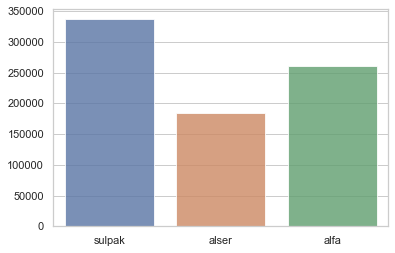

In [7]:
# -----------Tablets---------------
sulpak_tablet = pd.read_csv('data2/Final_tablets_sulpak.csv')
alser_tablet = pd.read_csv('data2/tablets_alser_kz.csv', sep=";")
alfa_tablet = pd.read_csv('data2/alfakz_Tablets.csv')

alser_tablet['Price'] = alser_phone['Price'].str.split().str.join('') 
alfa_tablet['Price'] = alfa_phone['Price'].str.replace(' ','') 

all_prices = pd.DataFrame() 
all_prices['sulpak'] = sulpak_tablet['price'].astype('float')
all_prices['alser'] = alser_tablet['Price'].astype('float')
all_prices['alfa'] = alfa_tablet['Price'].astype('float')
prices = all_prices.mean(skipna = True)
print(all_prices.mean(skipna = True))

sns.barplot(prices.index, prices.values, alpha=0.8)


sulpak    152
alser      22
alfa      152
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

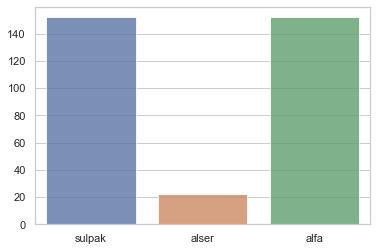

In [12]:
all_count = pd.DataFrame() 
all_count['sulpak'] = sulpak_tablet['price'].count()
all_count['alser'] = alser_tablet['Price'].count()
all_count['alfa'] = alfa_tablet['Price'].count()
count = all_prices.count()
print(all_prices.count())

sns.barplot(count.index, count.values, alpha=0.8)

sulpak    634115.783972
alser     190899.459459
alfa      253261.658537
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

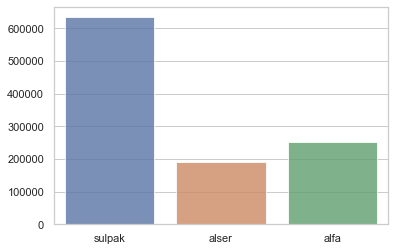

In [13]:
# -----------TV---------------
sulpak_tv = pd.read_csv('data2/Final_tv_sulpak.csv')
alser_tv = pd.read_csv('data2/televizor_alser_kz.csv', sep=";")
alfa_tv = pd.read_csv('data2/alfakz_TVs.csv')

alser_tv['Price'] = alser_phone['Price'].str.split().str.join('') 
alfa_tv['Price'] = alfa_phone['Price'].str.replace(' ','') 

all_prices = pd.DataFrame() 
all_prices['sulpak'] = sulpak_tv['price'].astype('float')
all_prices['alser'] = alser_tv['Price'].astype('float')
all_prices['alfa'] = alfa_tv['Price'].astype('float')
prices = all_prices.mean(skipna = True)
print(all_prices.mean(skipna = True))

sns.barplot(prices.index, prices.values, alpha=0.8)